# Carga de dataset desde Kaggle
El dataset se va a tomar usando la API beta de Kaggle, ya que nos interesa interacturar con el conjunto de datos

In [3]:
!pip install kaggle

In [4]:
#Cargar el token de Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhonatangranda","key":"0a00be360e79f5292391927ed8d7a387"}'}

In [5]:
!mkdir ~/.kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
import kaggle

In [9]:
!kaggle datasets list
#Para probar la conexion a la API de kaggle

ref                                                    title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                     Vehicle Sales Data                               19MB  2024-02-21 20:16:17          16494        288  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                               3KB  2024-03-02 18:50:30           6032        109  0.9411765        
nbroad/gemma-rewrite-nbroad                            gemma-rewrite-nbroad                              8MB  2024-03-03 04:52:39            770         69  1.0              
arnavvvvv/spotify-music                                Top Spotify Songs                                47KB  2024-03-06 05:2

In [18]:
!kaggle competitions download udea-ai4eng-20241

 42% 9.00M/21.2M [00:00<00:00, 34.2MB/s]
100% 21.2M/21.2M [00:00<00:00, 65.9MB/s]


In [19]:
!unzip udea-ai4eng-20241

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# Exploración del dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Crear dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [77]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

Podemos ver que el dataset consta de 692500 observaciones (17 columnas)

In [47]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              296786 non-null  int64 
 1   PERIODO                         296786 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             296786 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 5   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 6   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 7   FAMI_TIENEINTERNET              285247 non-null  object
 8   FAMI_EDUCACIONPADRE             286793 non-null  object
 9   FAMI_TIENELAVADORA              279527 non-null  object
 10  FAMI_TIENEAUTOMOVIL             277868 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           296786 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [26]:
train.shape

(692500, 17)

In [27]:
test.shape

(296786, 16)

In [28]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [30]:
test.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE'],
      dtype='object')

In [31]:
train.describe()

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


In [37]:
#Si quisiera saber la cantidad de estudiantes en Antioquia, por ejemplo

train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
ESTU_PRGM_DEPARTAMENTO,,,,,,,,,,,,,,,,,
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [44]:
train2 = pd.read_csv('train.csv', index_col='ESTU_PRGM_DEPARTAMENTO')

#train2.head()

#Si quisiera saber la cantidad de estudiantes por departamento

train2.loc["ANTIOQUIA"]

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
ESTU_PRGM_DEPARTAMENTO,,,,,,,,,,,,,,,,
ANTIOQUIA,989032,20212,PSICOLOGIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
ANTIOQUIA,659872,20203,MEDICINA VETERINARIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto
ANTIOQUIA,465511,20183,ADMINISTRACION DE EMPRESAS,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,Si,N,Si,Si,Si,Postgrado,alto
ANTIOQUIA,797253,20183,CIENCIA POLITICA,Menos de 500 mil,Más de 30 horas,Estrato 1,No,Primaria incompleta,No,No,N,Si,Si,No,Primaria incompleta,alto
ANTIOQUIA,240296,20183,INGENIERIA CIVIL,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANTIOQUIA,237810,20203,FINANZAS,Más de 7 millones,0,Estrato 6,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Educación profesional completa,medio-alto
ANTIOQUIA,344635,20212,CONTADURIA PUBLICA,Entre 4 millones y menos de 5.5 millones,Entre 21 y 30 horas,Estrato 5,No,Educación profesional completa,Si,No,N,Si,Si,No,Secundaria (Bachillerato) incompleta,bajo
ANTIOQUIA,279065,20183,BACTERIOLOGIA Y LABORATORIO CLINICO,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,medio-alto


Podemos ver que en Antioquia se presentan 83607 registros, y podria realizar lo mismo para cualquier departamento

In [50]:
#Evaluacion de valores nulos
print(train.isnull().values.any())
print(test.isnull().values.any())

True
True


Como tengo datos nulos, debo realiar un llenado o correción de los datos


In [51]:
#Evaluar si tengo datos duplicados
print("Para train.csv:", train.duplicated().sum())
print("Para test.csvn:", test.duplicated().sum())

Para train.csv: 0
Para test.csvn: 0


#Graficas

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>]], dtype=object)

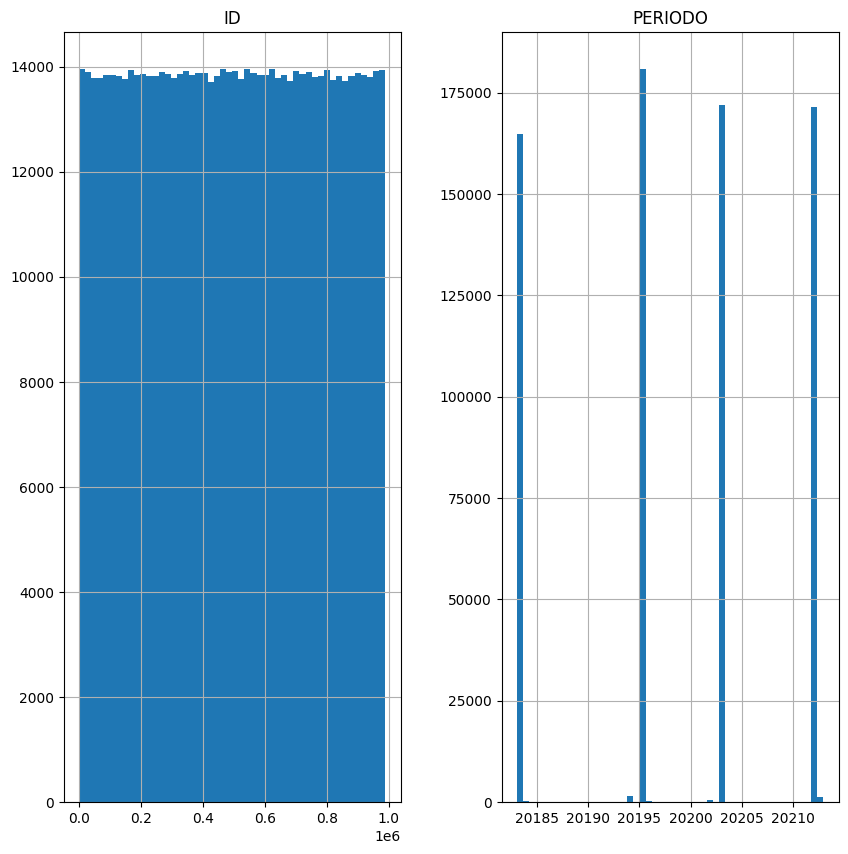

In [55]:
train.hist(bins=50, figsize=(10,10))

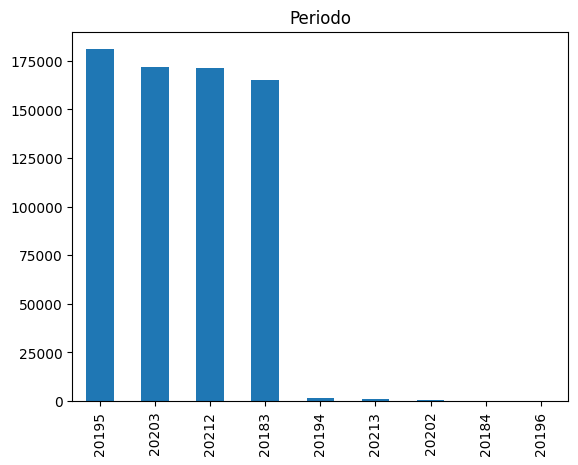

In [74]:
plot = train['PERIODO'].value_counts().plot(kind='bar',
                                            title='Periodo')